In [ ]:
import pandas as pd
import io
from google.colab import files
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn import metrics

#from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Import libraries for k-fold and cross validation, to test model accuracy using a mean score of k
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Import libraries from sklearn to create the models used for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Import libraries to be used for accuracy score, classification report in form of a confusion matrix and the code to find the mean absolute error of the model
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Import libraries for decision tree creation
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# **Data Exploration**

In [ ]:
#Loading the dataset into a DataFrame from local machine

data = pd.read_csv("ML-dataset.csv")
data.head()

# uploaded = files.upload()
# data = pd.read_csv(io.BytesIO(uploaded['ML-dataset.csv']))

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk


In [ ]:
data.head()

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk


In [ ]:
# Finding out some stats regarding the current dataset

data.describe(include='all')

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
count,1520.000000,1520.000000,1517,1518,1520,1517,1520,1518,1516.000000,1520,1517
unique,NaN,NaN,5,2,2,2,2,2,NaN,41,3
top,NaN,NaN,A-F,no,no,no,no,no,NaN,100,NoRisk
freq,NaN,NaN,493,1441,801,784,1190,1494,NaN,244,1008
mean,0.509545,188365.022368,NaN,NaN,NaN,NaN,NaN,NaN,78.872032,NaN,NaN
std,0.284006,64355.870242,NaN,NaN,NaN,NaN,NaN,NaN,10.162351,NaN,NaN
min,0.000295,78261.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN
25%,0.268531,137130.750000,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,NaN,NaN
50%,0.517616,191344.500000,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,NaN,NaN
75%,0.754724,244559.500000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN


**Running the describe function here shows there isn't many numeric columns in the dataset, Next lets check the types.**

In [ ]:
# View the datatypes for each column of the dataframe

data.dtypes

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra           object
label            object
dtype: object

In [ ]:
# Check how many values exist

data.count()

Random          1520
Id              1520
Indication      1517
Diabetes        1518
IHD             1520
Hypertension    1517
Arrhythmia      1520
History         1518
IPSI            1516
Contra          1520
label           1517
dtype: int64

In [ ]:
# Additional information regarding the values of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Random        1520 non-null   float64
 1   Id            1520 non-null   int64  
 2   Indication    1517 non-null   object 
 3   Diabetes      1518 non-null   object 
 4   IHD           1520 non-null   object 
 5   Hypertension  1517 non-null   object 
 6   Arrhythmia    1520 non-null   object 
 7   History       1518 non-null   object 
 8   IPSI          1516 non-null   float64
 9   Contra        1520 non-null   object 
 10  label         1517 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 130.8+ KB


**Contra is an object, it should be a number and therefore needs to be converted. This will be done during Data Analysis.**

# **Data Analysis**

**Eliminating any missing values from the data is the first step. If there is missing data in this dataframe, it won't be kept unless there are an excessive number of missing values.**

**Let's count the number of Risk and No Risk values in the column *labeled* "Label," which is the most significant attribute since it is where the primary classification will occur.**

In [ ]:
# Create a new dataframe that only contains the values within the column label, and then count them

data["label"].value_counts()

label
NoRisk     1008
Risk        507
Unknown       2
Name: count, dtype: int64

**There are 2 unknown vlaues, alongside 'risk' and 'no-risk' which should be ideally removed!**

In [ ]:
# Show only the values with an unknown label value

label = data[data["label"] == "Unknown"]
label

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
475,0.298074,173791,ASx,no,yes,yes,no,no,70.0,55,Unknown
523,0.460170,283846,CVA,no,no,yes,yes,no,95.0,100,Unknown


**Uknown values will be replaced with Nan values, which would further be removed in preprocessing steps.**

**The values should be retained, but since there are only 2 unknown values out of a possible 1520, it won't have a significant effect if these 2 records are removed.**

In [ ]:
# Replacing Unknown values to Nan

data["label"] = data["label"].replace("Unknown", np.nan)

**'Random' and Id' are two unique identifiers in the datset, that is not required for classification. Hence, they are safe to remove.**

In [ ]:
# Create a list that only includes the column data for 'Random' and 'Id'

del_col_list = ['Random', 'Id']

In [ ]:
# Create a new dataframe without random and ID

clean_data = data.drop(del_col_list, axis=1)
clean_data.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,TIA,no,no,no,no,no,70.0,60,NoRisk
2,A-F,no,yes,yes,no,no,95.0,40,Risk
3,TIA,no,no,yes,no,no,90.0,85,Risk
4,CVA,no,no,no,no,no,70.0,20,NoRisk


In [ ]:
# Indication column has 5 category of values.

clean_data["Indication"].value_counts()

Indication
A-F    493
CVA    416
TIA    390
ASx    186
Asx     32
Name: count, dtype: int64

**As observed, 'ASx' and 'Asx' are two categories having same values. Hence, it is required to merge them into one.**

In [ ]:
# Replace all values with ASx to Asx to match majority of values in the dataframe

clean_data["Indication"] = clean_data["Indication"].replace("ASx", "Asx")
clean_data["Indication"].value_counts()

Indication
A-F    493
CVA    416
TIA    390
Asx    218
Name: count, dtype: int64

In [ ]:
# Converting all values of the 'Contra' column to numeric values. Also, any blank values found will be converted to NaN.

clean_data["Contra"] = pd.to_numeric(clean_data["Contra"], errors="coerce")

In [ ]:
#As observed, column 'contra' has been converted to float values.

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Indication    1517 non-null   object 
 1   Diabetes      1518 non-null   object 
 2   IHD           1520 non-null   object 
 3   Hypertension  1517 non-null   object 
 4   Arrhythmia    1520 non-null   object 
 5   History       1518 non-null   object 
 6   IPSI          1516 non-null   float64
 7   Contra        1519 non-null   float64
 8   label         1515 non-null   object 
dtypes: float64(2), object(7)
memory usage: 107.0+ KB


In [ ]:
# Finding all values that contain Nan values

null_data = clean_data[clean_data.isnull().any(axis=1)]
print("Length of null_data:",len(null_data))
print(null_data)

Length of null_data: 20
     Indication Diabetes  IHD Hypertension Arrhythmia History  IPSI  Contra  \
201         CVA      yes   no          NaN        yes      no  95.0    90.0   
337         CVA       no  yes           no         no     NaN  85.0    50.0   
442         NaN       no  yes          yes         no      no  70.0    40.0   
447         CVA      NaN  yes          yes        yes      no  90.0   100.0   
453         Asx       no   no          yes         no      no  70.0     NaN   
475         Asx       no  yes          yes         no      no  70.0    55.0   
514         A-F      NaN   no          yes         no      no  80.0    40.0   
523         CVA       no   no          yes        yes      no  95.0   100.0   
590         A-F       no   no          NaN         no      no  78.0    30.0   
620         A-F       no   no           no         no      no   NaN   100.0   
752         CVA       no  yes          yes        yes      no   NaN   100.0   
784         CVA       no   n

**The percentage of Nan values to check if the null values can be considered negligible is calculated here.**

In [ ]:
#percentage of Nan values in the dataset

null_data_percent = clean_data.isnull().sum() * 100 / len(clean_data)
print(null_data_percent)

Indication      0.197368
Diabetes        0.131579
IHD             0.000000
Hypertension    0.197368
Arrhythmia      0.000000
History         0.131579
IPSI            0.263158
Contra          0.065789
label           0.328947
dtype: float64


**It is observable that percentage of Nan values are significantly less. Hence, it would create no impact removing them.**

In [ ]:
# Drop all data values that are Nan

clean_data = clean_data.dropna()
clean_data.isnull().sum()

Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

In [ ]:
# Performing a new count to check how many values are present after removal

clean_data.count()

Indication      1500
Diabetes        1500
IHD             1500
Hypertension    1500
Arrhythmia      1500
History         1500
IPSI            1500
Contra          1500
label           1500
dtype: int64

In [ ]:
# Find out stats regarding the current dataset

clean_data.describe(include='all')

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
count,1500,1500,1500,1500,1500,1500,1500.000000,1500.000000,1500
unique,4,2,2,2,2,2,NaN,NaN,2
top,A-F,no,no,no,no,no,NaN,NaN,NoRisk
freq,489,1425,789,777,1177,1478,NaN,NaN,1000
mean,NaN,NaN,NaN,NaN,NaN,NaN,78.828000,56.668000,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,10.159555,29.524977,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,10.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,30.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,50.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,85.000000,NaN


In [ ]:
# Running a check to make sure the label column only has 'risk' and 'no risk'

clean_data["label"].value_counts()

label
NoRisk    1000
Risk       500
Name: count, dtype: int64

# **Data Pre-processing**

**The next step will be to use Sklearn's LabelEncoder feature to convert all of the yes/no categorical values to numbers.**

**Using the get_dummies features, Risk and NoRisk will be modified and added to a different dataframe.**

In [ ]:
print("Indication' : ",clean_data['Indication'].unique())
print("Diabetes' : ",clean_data['Diabetes'].unique())
print("IHD' : ",clean_data['IHD'].unique())
print("Hypertension' : ",clean_data['Hypertension'].unique())
print("Arrhythmia' : ",clean_data['Arrhythmia'].unique())
print("History' : ",clean_data['History'].unique())
print("label' : ",clean_data['label'].unique())

Indication' :  ['A-F' 'TIA' 'CVA' 'Asx']
Diabetes' :  ['no' 'yes']
IHD' :  ['no' 'yes']
Hypertension' :  ['yes' 'no']
Arrhythmia' :  ['no' 'yes']
History' :  ['no' 'yes']
label' :  ['NoRisk' 'Risk']


In [ ]:
# create the Labelencoder object

le = preprocessing.LabelEncoder()

# Create a dummy for the column label to better visualise risk vs no risk

clean_data_risk = pd.get_dummies(clean_data["label"])
clean_data_risk = clean_data_risk.astype(int)

# Convert the categorical columns into numeric using LabelEncoder
categorical_columns = ['Diabetes', 'IHD', 'Hypertension', 'Arrhythmia', 'History']

for col in categorical_columns:
    clean_data.loc[:,col] = le.fit_transform(clean_data[col])

In [ ]:
# Add the dummy variable we created to the end of our current table

clean_data = pd.concat([clean_data, clean_data_risk], axis=1)
clean_data.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label,NoRisk,Risk
0,A-F,0,0,1,0,0,78.0,20.0,NoRisk,1,0
1,TIA,0,0,0,0,0,70.0,60.0,NoRisk,1,0
2,A-F,0,1,1,0,0,95.0,40.0,Risk,0,1
3,TIA,0,0,1,0,0,90.0,85.0,Risk,0,1
4,CVA,0,0,0,0,0,70.0,20.0,NoRisk,1,0


In [ ]:
# Create a new variable for the label column

clean_data_label = ["label"]

# Create a new dataframe, and then drop the label column using the variable created above

clean_data_dummy = clean_data.drop(clean_data_label, axis=1)
clean_data_dummy.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,NoRisk,Risk
0,A-F,0,0,1,0,0,78.0,20.0,1,0
1,TIA,0,0,0,0,0,70.0,60.0,1,0
2,A-F,0,1,1,0,0,95.0,40.0,0,1
3,TIA,0,0,1,0,0,90.0,85.0,0,1
4,CVA,0,0,0,0,0,70.0,20.0,1,0


In [ ]:
clean_data.info()
clean_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1519
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Indication    1500 non-null   object 
 1   Diabetes      1500 non-null   object 
 2   IHD           1500 non-null   object 
 3   Hypertension  1500 non-null   object 
 4   Arrhythmia    1500 non-null   object 
 5   History       1500 non-null   object 
 6   IPSI          1500 non-null   float64
 7   Contra        1500 non-null   float64
 8   label         1500 non-null   object 
 9   NoRisk        1500 non-null   int64  
 10  Risk          1500 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Indication    1500 non-null   object 
 1   Diabetes      1500 non-null   object 
 

# **Data Visualisation**

**Data Visualisation makes it easier for us to analyse the data rather than just looking at the dataframes.**

**BAR CHAR -> There are 4 categories of indication. The given bar chart shows how many risk and no-risk patients are in the dataset that accompany each of these indications.**

*The majority of TIA labeled patients in the dataset are classified as a no-risk patient.
CVA also has much higher no-risk result than that of those labelled as to be at risk.*


Text(0.5, 1.0, 'Indication count of Risk/NoRisk')

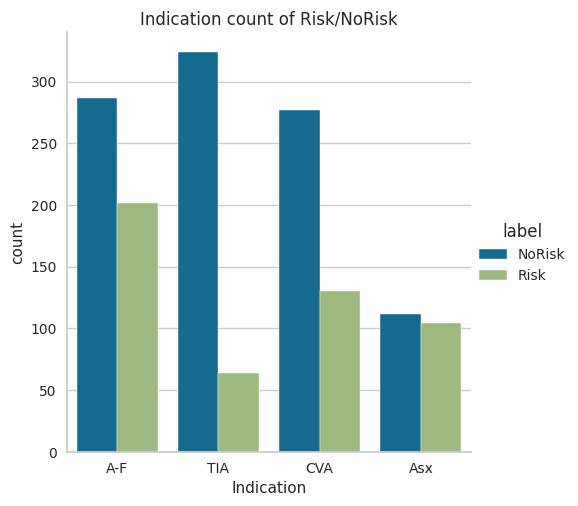

In [ ]:
sns.set_style("whitegrid")
vis4 = sns.catplot(x="Indication", hue="label", data=clean_data, kind="count")
plt.title("Indication count of Risk/NoRisk")

**Computed below is the mean scores for each numerical value alongside the amount of risk and no-risk patients in each section.**

*The table shows the patients who have a risk classification, have much higher mean scores in terms of contra. However, that's not the case with IPSI.*

In [ ]:
# Mean scores for each Indication alongside each label

clean_data_dummy.groupby(["Indication", "Risk", "NoRisk"]).mean()

Diabetes       IHD Hypertension Arrhythmia   History  \
Indication Risk NoRisk                                                         
A-F        0    1            0.0  0.421603      0.28223        0.0       0.0   
           1    0       0.113861  0.633663     0.589109   0.584158  0.009901   
Asx        0    1            0.0  0.330357     0.267857        0.0       0.0   
           1    0       0.144231  0.673077     0.865385   0.653846       0.0   
CVA        0    1       0.021661  0.382671     0.371841   0.025271   0.00722   
           1    0       0.053846  0.661538     0.923077   0.892308  0.030769   
TIA        0    1            0.0  0.373457     0.404321   0.009259  0.040123   
           1    0          0.375   0.65625     0.765625   0.171875  0.015625   

                             IPSI     Contra  
Indication Risk NoRisk                        
A-F        0    1       76.452962  39.233449  
           1    0       87.559406  81.267327  
Asx        0    1       78.151786  35.705357  
           1    0       82.788462  82.259615  
CVA        0    1       74.877256  46.028881  
           1    0       85.969231  88.038462  
TIA        0    1       73.669753  46.595679  
           1    0       85.375000  85.625000

**Here is the distribution of the values of IPSI and Contra across the whole dataset.**

*We can observe, the values of IPSI are right skewed. However, the contra values are more evenly distributed.*

<ipython-input-32-73d84d61fdb9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean_data["IPSI"], bins = 20, rug=True)


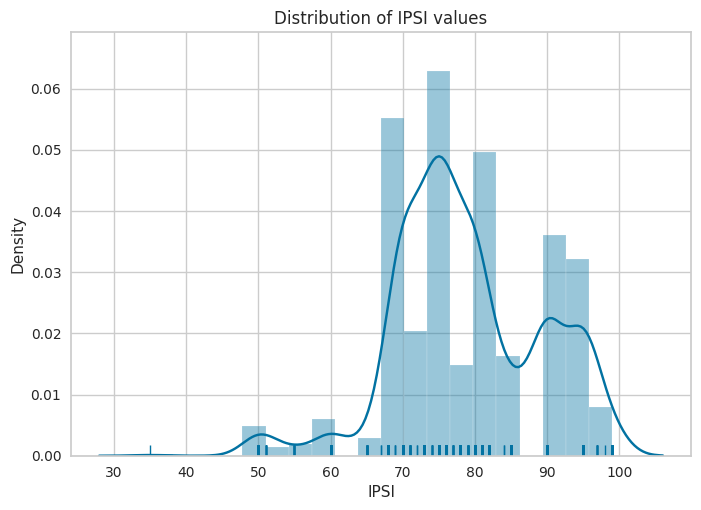

In [ ]:
# Visualise the distribution across the IPSI value

sns.distplot(clean_data["IPSI"], bins = 20, rug=True)
plt.title("Distribution of IPSI values")
plt.ylabel("Density")
plt.show()

<ipython-input-33-06cb5438b5cb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean_data["Contra"], bins = 20, rug=True)


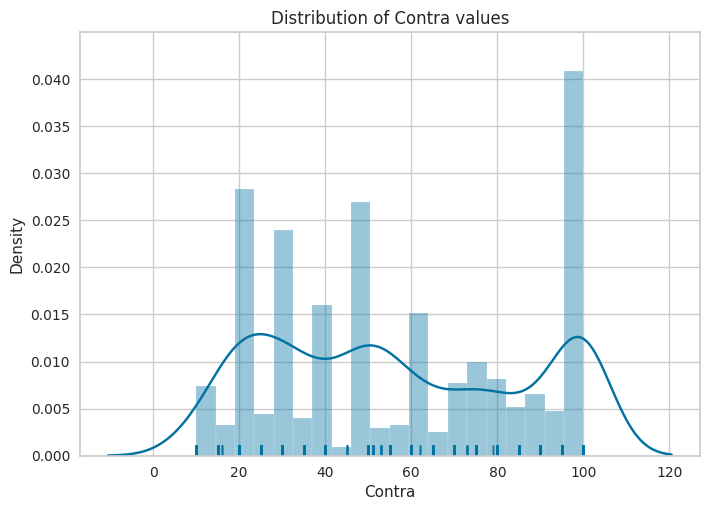

In [ ]:
# Visualise the distribution across the Contra value

sns.distplot(clean_data["Contra"], bins = 20, rug=True)
plt.title("Distribution of Contra values")
plt.ylabel("Density")
plt.show()

*The distribution graphs aid in providing a visual representation of the dataset's majority of values. While the Contra tends to have a more equal variation of values that flow across the entire dataset, with the highest values seemingly appearing at a 100 value, the highest possible value, the IPSI data tends to fall primarily in the 60-80 value area, as indicated by the distribution line.*

**BOX PLOT -> It is useful to show the distribution of the quantitative data in order to compare the features for risk and no-risk label.**
**The box represents the range of the values, the line in the centre represents the median value. The circle outside the range shows the outlier values for the boxplot.**

*The box plot for IPSI shows the values of no-risk are below 80. It also has few outliers. However, for the label risk, the values are above 80. There are few outlier between the range of 50 to 60.*

Text(0.5, 1.0, 'Boxplot of IPSI scores against Risk/NoRisk')

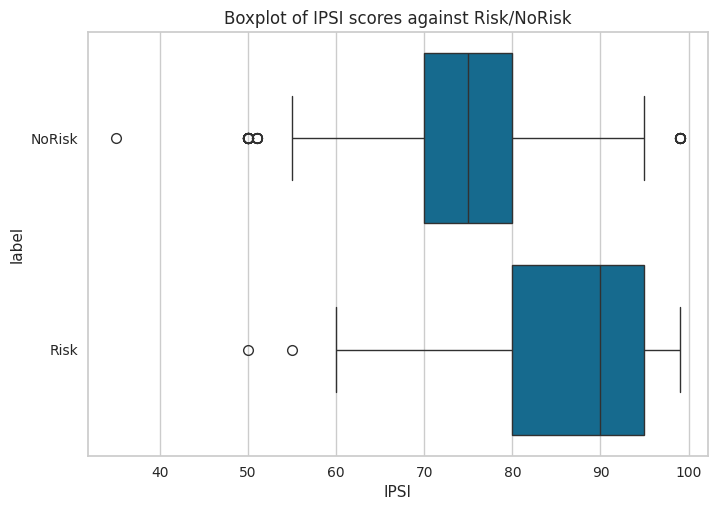

In [ ]:
# Create a boxplot that uses IPSI as the quantitative measure, and the label as the comparison

sns.boxplot(x = clean_data["IPSI"], y = clean_data["label"])
plt.title("Boxplot of IPSI scores against Risk/NoRisk")

*The box plot for Contra, the values for no-risk patients are below 60. The patient with risk value have values above 75, with few outliers.*

Text(0.5, 1.0, 'Boxplot of Contra scores against Risk/NoRisk')

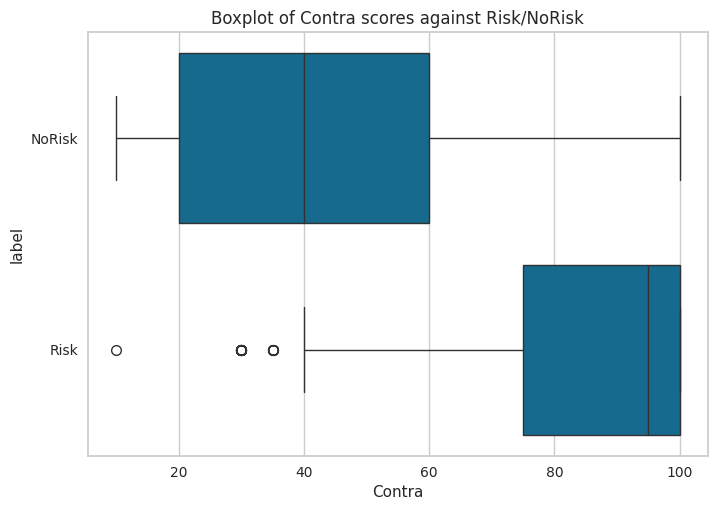

In [ ]:
# Create a boxplot that uses Contra as the quantitative measure, and the label as the comparison

sns.boxplot(x = clean_data["Contra"], y = clean_data["label"])
plt.title("Boxplot of Contra scores against Risk/NoRisk")

*It is clearly observable from the box plots that the distribution for contra values is more important than the distribution of IPSI values.*
*We can see, the higher value for contra means you are at the risk. However, the higher values for IPSI does not give clear classification of risk/no-risk.*

Text(0.5, 1.0, 'Boxplot of IPSI against each Indication')

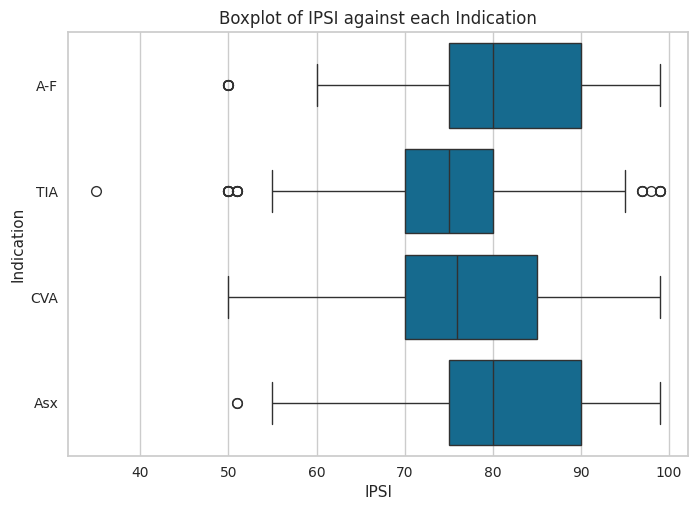

In [ ]:
# Create a boxplot that uses IPSI as the quantitative measure, and the Indication as the comparison

sns.boxplot(x = clean_data["IPSI"], y = clean_data["Indication"])
plt.title("Boxplot of IPSI against each Indication")

*As observed before, the plot between IPSI values aganist the categories of indication lies majorly between 70 to 90. It does not give the clear insight for the classification.*

Text(0.5, 1.0, 'Boxplot of Contra against each Indication')

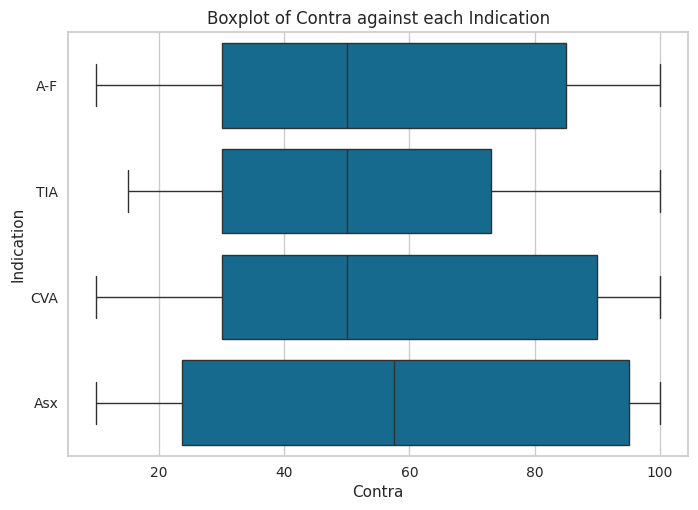

In [ ]:
# Create a boxplot that uses Contra as the quantitative measure, and the Indication as the comparison

sns.boxplot(x = clean_data["Contra"], y = clean_data["Indication"])
plt.title("Boxplot of Contra against each Indication")

*The box plot of Contra shows the data is widely spread across all the classes and there are no outliers at all.*

# **Data Normalization**

**Data normalization is used for feature scaling. It changes all the vaues in the range of 0-1 for further computation.**

In [ ]:
# Normalise the IPSI and Contra values so they can be easily evaluated within models

clean_data["IPSI"] = (clean_data["IPSI"] - clean_data["IPSI"].min()) / (clean_data["IPSI"].max() - clean_data["IPSI"].min())

clean_data["Contra"] = (clean_data["Contra"] - clean_data["Contra"].min()) / (clean_data["Contra"].max() - clean_data["Contra"].min())

clean_data.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label,NoRisk,Risk
0,A-F,0,0,1,0,0,0.671875,0.111111,NoRisk,1,0
1,TIA,0,0,0,0,0,0.546875,0.555556,NoRisk,1,0
2,A-F,0,1,1,0,0,0.937500,0.333333,Risk,0,1
3,TIA,0,0,1,0,0,0.859375,0.833333,Risk,0,1
4,CVA,0,0,0,0,0,0.546875,0.111111,NoRisk,1,0


In [ ]:
# create the variable that the new data will go into, thus maintaining data integrity

clean_data_process = clean_data
clean_data_indication = pd.get_dummies(clean_data_process["Indication"])
clean_data_indication = clean_data_indication.astype(int)

# Add the dummy variable we created to the end of our current table

clean_data_process = pd.concat([clean_data_process, clean_data_indication], axis=1)

clean_data_process['label'] = le.fit_transform(clean_data['label'])

# display the initial records

clean_data_process.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label,NoRisk,Risk,A-F,Asx,CVA,TIA
0,A-F,0,0,1,0,0,0.671875,0.111111,0,1,0,1,0,0,0
1,TIA,0,0,0,0,0,0.546875,0.555556,0,1,0,0,0,0,1
2,A-F,0,1,1,0,0,0.937500,0.333333,1,0,1,1,0,0,0
3,TIA,0,0,1,0,0,0.859375,0.833333,1,0,1,0,0,0,1
4,CVA,0,0,0,0,0,0.546875,0.111111,0,1,0,0,0,1,0


**Further step is to remove certain columns in order to train the model.**

In [ ]:
# removing the indication, label, risk and no risk columns

riskclassify = [col for col in clean_data_process.columns if col not in ['Indication','Risk','NoRisk','label']]
meddata = clean_data_process[riskclassify]
meddata.head()

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,A-F,Asx,CVA,TIA
0,0,0,1,0,0,0.671875,0.111111,1,0,0,0
1,0,0,0,0,0,0.546875,0.555556,0,0,0,1
2,0,1,1,0,0,0.937500,0.333333,1,0,0,0
3,0,0,1,0,0,0.859375,0.833333,0,0,0,1
4,0,0,0,0,0,0.546875,0.111111,0,0,1,0


## **Model Training**

**A classification model learn from the input values given for training. It will predict the class label for the new data. (whether the patient will be at risk or not)**

**The aim of the model is to achieve 'Low False Negative' as much as possible. (It means to reduce the chances of classifying a patient with no-risk when they are actually at risk)**

In [ ]:
#declare the target of the model

target = clean_data_process['label']

**We are splitting the data into 70/30 for training and testing purpose.**

In [ ]:
#create and split up the training and test data for the models

x = meddata
y = target

#create the train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, shuffle=False)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1050, 11)
(1050,)
(450, 11)
(450,)


**Computing null accuracy -> It is a baseline measure used in classification problems to evaluate the effectiveness of a model.**

In [ ]:
# examine class distribution
print(y_test.value_counts(), "\n")

# calculate the percentage of 0
print(1 - y_test.mean(), "\n")

# calculate the null accuracy, in a single line of code
print("%0.2f " % max(y_test.mean(), 1 - y_test.mean()))

label
0    300
1    150
Name: count, dtype: int64 

0.6666666666666667 

0.67 


**Every model must consistently outperform the computed null accuracy to avoid being labeled as dumb model.**

# **K-Nearest Neighbours Model**

**KNN, or K-Nearest-Neighbors, is a straightforward algorithm that is simple to use. This algorithm predicts the output based on the existence of similar objects nearby, which we designate as K.**

**K's value can lead to variety of accuracy results. Given that there are 450 total data points in the train/test split, let's assume K=5 for now.**

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)

# predict the response

pred = neigh.predict(x_test)

# evaluate accuracy

knnaccuracy = accuracy_score(y_test, pred, normalize = True)
print ("KNeighbors (K=5) classification accuracy score : %0.2f " % knnaccuracy)

KNeighbors (K=5) classification accuracy score : 0.96 


**The model achieves a good level of accuracy (96%) when K = 5.**

**To provide a clearer visual representation of the distribution of the results, the classification report and confusion matrix are generated below.**


In [ ]:
print(metrics.classification_report(y_test, pred))
cf_knn = confusion_matrix(y_test, pred)
print(cf_knn)
print("\n")
knnsqr = metrics.mean_squared_error(y_test, pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       300
           1       0.94      0.93      0.94       150

    accuracy                           0.96       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.96      0.96      0.96       450

[[291   9]
 [ 10 140]]


Mean Absolute Error: 0.042222222222222223
Mean Squared Error: 0.042222222222222223


In [ ]:
classes = ['NoRisk', 'Risk']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    sns.set_style("dark")
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cf_nb = confusion_matrix(y_test, pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cf_nb = cf_nb.astype('float') / cf_nb.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cf_nb)

    fig, ax = plt.subplots()
    im = ax.imshow(cf_nb, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cf_nb.shape[1]),
           yticks=np.arange(cf_nb.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cf_nb.max() / 2.
    for i in range(cf_nb.shape[0]):
        for j in range(cf_nb.shape[1]):
            ax.text(j, i, format(cf_nb[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cf_nb[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


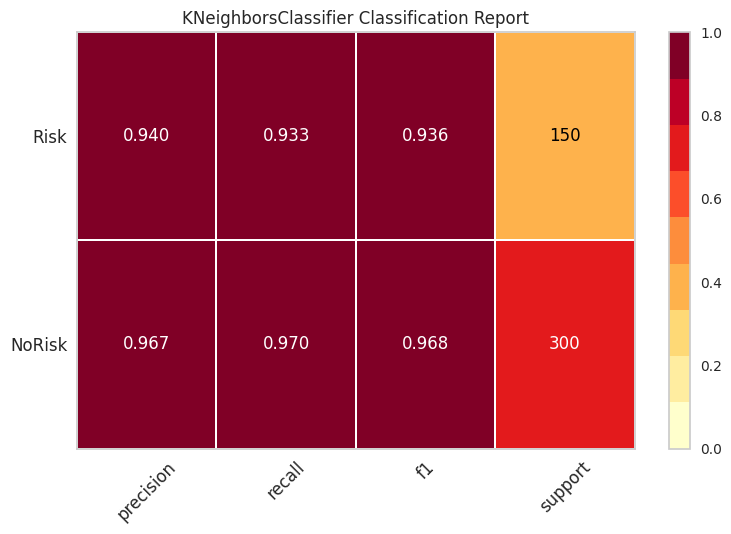

Confusion matrix, without normalization
[[291   9]
 [ 10 140]]


Normalized confusion matrix
[[0.97 0.03]
 [0.07 0.93]]


<Axes: title={'center': 'KNN Normalised Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

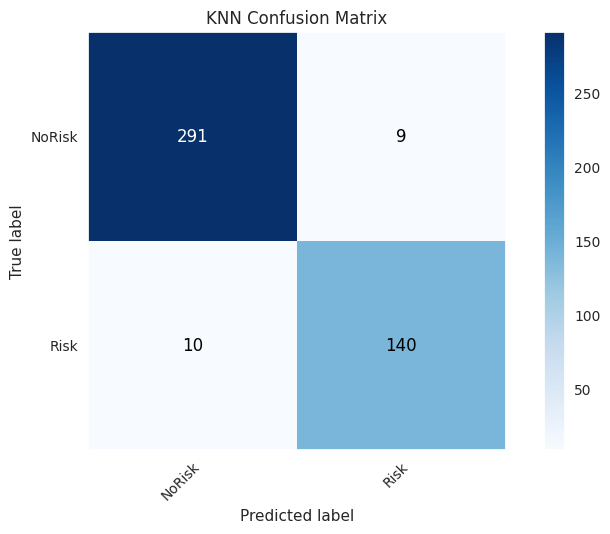

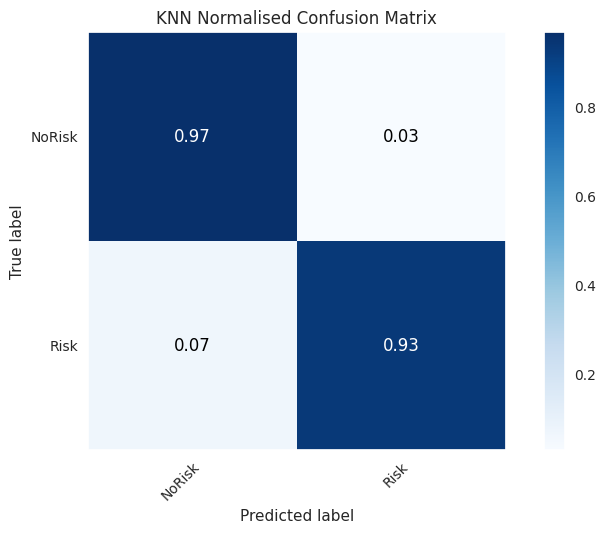

In [ ]:
# Instantiate the classification model and visualizer

visualizer = ClassificationReport(neigh, classes=['NoRisk','Risk'], support=True)
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof()

# Plot non-normalized confusion matrix

plot_confusion_matrix(y_test, pred, classes=classes, title='KNN Confusion Matrix')
print("\n")

# Plot normalized confusion matrix

plot_confusion_matrix(y_test, pred, classes=classes, normalize=True, title='KNN Normalised Confusion Matrix')

*As observable in normalized confusion matrix, 97% of precision is recorded for no-risk classification, whereas 93% of precision is for risk classification.*

**Cross-validation on KNN is performed to compare it with train/test split.**

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)

#Train the algorithm

knnscore = cross_val_score(neigh, x, y, cv=10, scoring='accuracy')
print(knnscore)
print("\n")
print("KNeighbours Cross-Validation Accuracy : %0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

[0.99 0.97 0.97 0.99 0.98 0.97 0.94 0.97 0.97 0.94]


KNeighbours Cross-Validation Accuracy : 0.97 (+/- 0.03)


*Using cross-validation approach, the mean accuracy for KNN (K=5) is 97%, along with the variance of 0.03.*

In [ ]:
y_pred = cross_val_predict(neigh, x, y, cv = 10)
print(metrics.classification_report(y, y_pred))
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.96      0.95      0.95       500

    accuracy                           0.97      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.97      0.97      0.97      1500

[[979  21]
 [ 25 475]]


**Let's find the best value for K, as some other value of K might give the better accuracy.**

In [ ]:
#search for an optimal value for K for KNN

k_range = range(1, 31)
k_scores = []
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k)
    knnscore = cross_val_score(neigh, x, y, cv=10, scoring='accuracy')
    k_scores.append(knnscore.mean())
print(k_scores)

[0.9879999999999999, 0.9833333333333332, 0.9786666666666666, 0.9733333333333334, 0.9693333333333334, 0.9706666666666666, 0.9646666666666667, 0.9606666666666668, 0.96, 0.954, 0.952, 0.9453333333333334, 0.9486666666666667, 0.9446666666666668, 0.946, 0.9460000000000001, 0.9446666666666668, 0.9460000000000001, 0.9406666666666667, 0.9406666666666667, 0.9413333333333332, 0.9373333333333334, 0.9366666666666668, 0.9306666666666666, 0.9313333333333332, 0.9273333333333333, 0.9273333333333333, 0.9173333333333332, 0.9166666666666666, 0.9099999999999999]


**The plot for range of K values v/s accuracy scores will give the better understanding to the appropriate K value to choose.**

Text(0, 0.5, 'Cross-Validated Accuracy')

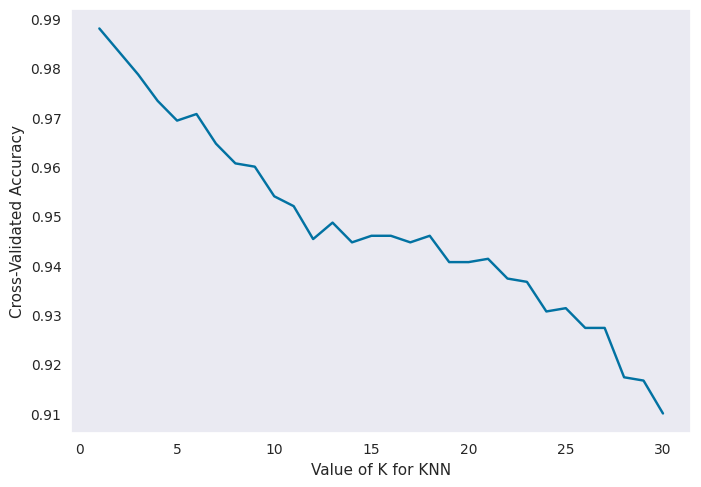

In [ ]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

*The graph demonstrates that for this dataset, accuracy measurement decreases when K increases. Accuray reached up to 92% when K reaches to 31.*

**If K increases, the training error will increase -> bias increases.**

**However, the testing error decreases -> variance decrease.**

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

#Train the algorithm

knnscore = cross_val_score(neigh, x, y, cv=10, scoring='accuracy')
print(knnscore)
print("\n")
print("KNeighbours Cross-Validation Accuracy : %0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

[1.   0.98 0.97 0.99 0.98 0.99 0.96 0.99 0.97 0.95]


KNeighbours Cross-Validation Accuracy : 0.98 (+/- 0.03)


*Using cross-validation approach, the mean accuracy for KNN (K=3) is 98%, along with the variance of 0.03.*

In [ ]:
y_pred = cross_val_predict(neigh, x, y, cv = 10)
print(metrics.classification_report(y, y_pred))
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)
print("\n")
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.97      0.97      0.97       500

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500

[[985  15]
 [ 17 483]]


Mean Absolute Error: 0.021333333333333333
Mean Squared Error: 0.021333333333333333


**Applying K=3 on KNN model using train.test split.**

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

# predict the response

pred = neigh.predict(x_test)

# evaluate accuracy

knnaccuracy = accuracy_score(y_test, pred, normalize = True)
print ("KNeighbors (K=3) classification accuracy score : %0.2f " % knnaccuracy)

KNeighbors (K=3) classification accuracy score : 0.96 


In [ ]:
print(metrics.classification_report(y_test, pred))
cf_knn = confusion_matrix(y_test, pred)
print(cf_knn)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       300
           1       0.94      0.94      0.94       150

    accuracy                           0.96       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.96      0.96      0.96       450

[[291   9]
 [  9 141]]


**By comparing the confusion matrices of KNN model for K=5 and K=3, it is observable that for K=3 only one 'false negative' has been reduced.**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


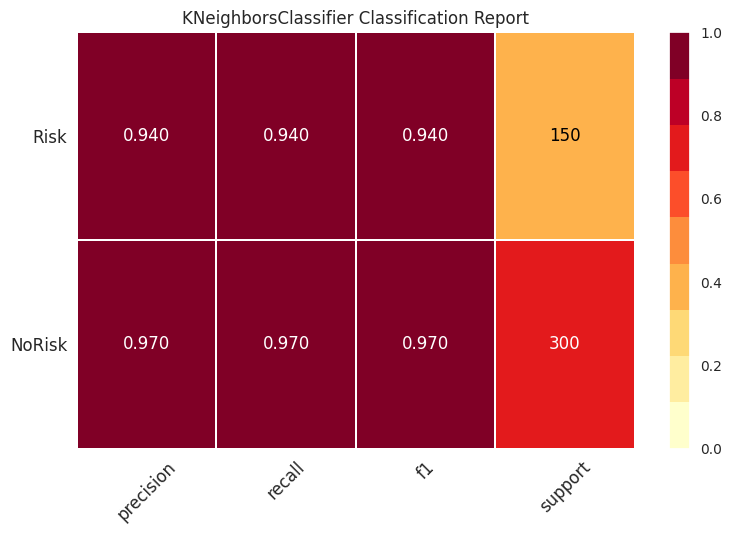

Confusion matrix, without normalization
[[291   9]
 [  9 141]]


<Axes: title={'center': 'KNN Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

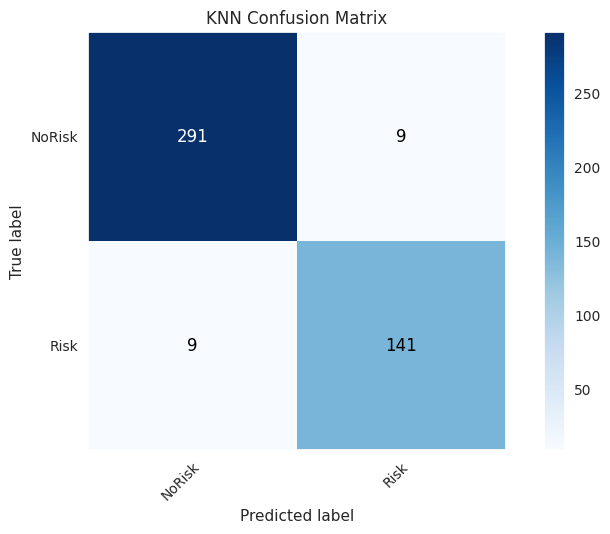

In [ ]:
# Instantiate the classification model and visualizer

visualizer = ClassificationReport(neigh, classes=['NoRisk','Risk'], support=True)
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof()

# Plot non-normalized confusion matrix

plot_confusion_matrix(y_test, pred, classes=classes,
                      title='KNN Confusion Matrix')

#**Logistic Regression**

**Similar to Linear Regression, Logistic Regression is a method that performs better when predicting based on a binary output, in this case, 0 and 1, which are linked to the norisk and risk objective.**

**If the solver is set to lbfgs, multinomial loss will be handled. The maximum iteration is set to 1000; the default is 100.**

In [ ]:
# multiclass 'auto' selects 'ovr' if the data is binary, or if solver='liblinear',
# otherwise selects 'multinomial'.

logreg =LogisticRegression(solver='lbfgs', max_iter=1000, multi_class="auto")
logreg.fit(x_train, y_train)

# predict the response

pred = logreg.predict(x_test)

# evaluate accuracy

logregaccuracy = accuracy_score(y_test, pred, normalize = True)
print ("Logistic Regression classification accuracy score : %0.2f " % logregaccuracy)
cf_lr = confusion_matrix(y_test, pred)
print(cf_lr)

Logistic Regression classification accuracy score : 0.96 
[[294   6]
 [ 14 136]]


**Since this isn't a multi-class problem, which lbfgs is often only good for, let's try switching the solver to something else.**

In [ ]:
logreg =LogisticRegression(solver='liblinear', max_iter=1000, multi_class="auto")
logreg.fit(x_train, y_train)

# predict the response

pred = logreg.predict(x_test)

# evaluate accuracy

logregaccuracy = accuracy_score(y_test, pred, normalize = True)
print ("Logistic Regression classification accuracy score : %0.2f " % logregaccuracy)
cf_lr = confusion_matrix(y_test, pred)
print(cf_lr)

Logistic Regression classification accuracy score : 0.94 
[[288  12]
 [ 16 134]]


**It gets worse. Let's try adding class_weight = balanced and changing the penalty, which is set to l2.**

In [ ]:
# Adding class weight into the previously best model of the above tests

logreg =LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, multi_class="auto",\
                          class_weight='balanced')
logreg.fit(x_train, y_train)

# predict the response

pred = logreg.predict(x_test)

# evaluate accuracy

logregaccuracy = accuracy_score(y_test, pred, normalize = True)
print ("Logistic Regression classification accuracy score : %0.2f " % logregaccuracy)
cf_lr = confusion_matrix(y_test, pred)
print(cf_lr)

Logistic Regression classification accuracy score : 0.96 
[[290  10]
 [  8 142]]


**Here there is an increase in Positive classification results, how about l1 penalty without class weight .**

In [ ]:
logreg =LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, multi_class="auto")
logreg.fit(x_train, y_train)
# predict the response
pred = logreg.predict(x_test)
# evaluate accuracy
logregaccuracy = accuracy_score(y_test, pred, normalize = True)
print ("Logistic Regression classification accuracy score : %0.2f " % logregaccuracy)
cf_lr = confusion_matrix(y_test, pred)
print(cf_lr)

Logistic Regression classification accuracy score : 0.97 
[[294   6]
 [  8 142]]


**The model marginally deteriorates when the class weight hyper-parameter is added as balanced. With the hyper-parameters modified, the accuracy is 97%.**

**Here, the default hyper-parameters have been modified a little. The max number of iterations has been raised from 100 to 1000, and the default solver has been adjusted.**

**If a solver is left unset, lbfgs is used by default and a warning is displayed. Additional statistics can be found in the confusion matrix and categorization report below.**

In [ ]:
print(metrics.classification_report(y_test, pred))
print(cf_lr)
print("\n")
logregsqr = metrics.mean_squared_error(y_test, pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       300
           1       0.96      0.95      0.95       150

    accuracy                           0.97       450
   macro avg       0.97      0.96      0.96       450
weighted avg       0.97      0.97      0.97       450

[[294   6]
 [  8 142]]


Mean Absolute Error: 0.03111111111111111
Mean Squared Error: 0.03111111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


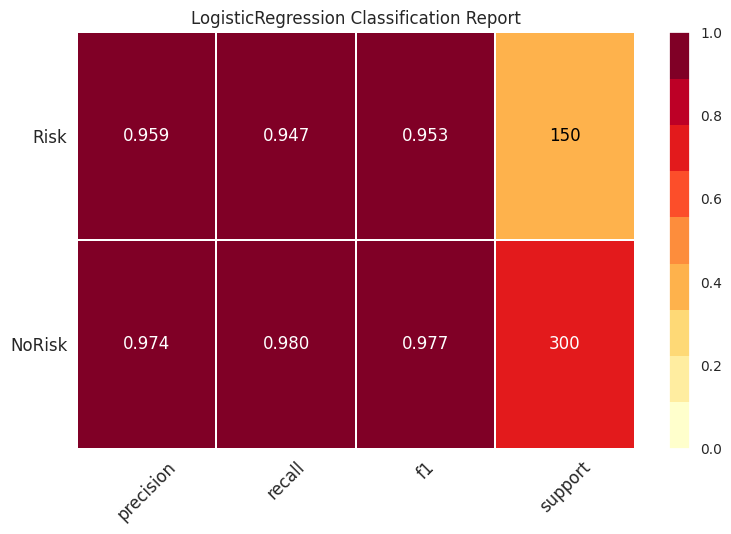

Confusion matrix, without normalization
[[294   6]
 [  8 142]]


Normalized confusion matrix
[[0.98 0.02]
 [0.05 0.95]]


<Axes: title={'center': 'Logistic Regression Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

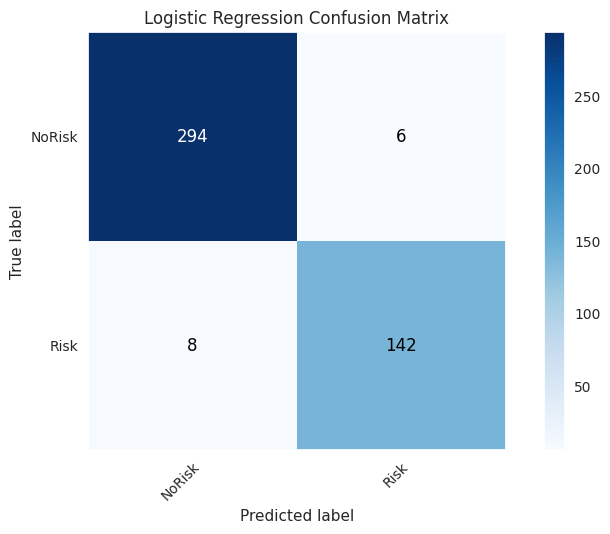

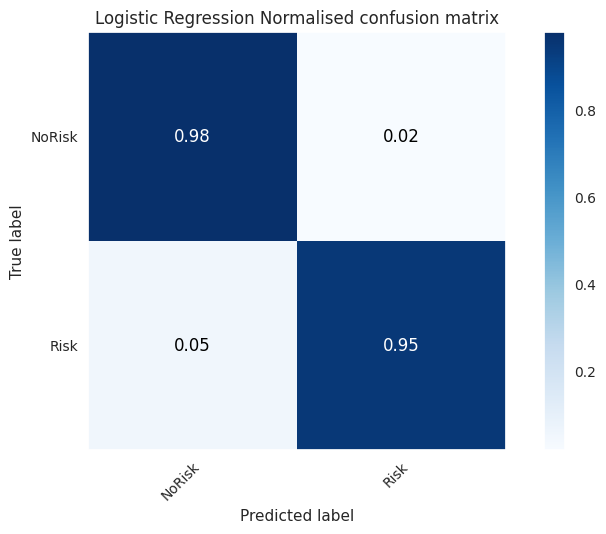

In [ ]:
# Instantiate the classification model and visualizer

visualizer = ClassificationReport(logreg, classes=['NoRisk','Risk'], support=True)
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof()

# Plot non-normalized confusion matrix

plot_confusion_matrix(y_test, pred, classes=classes,
                      title='Logistic Regression Confusion Matrix')
print("\n")

# Plot normalized confusion matrix

plot_confusion_matrix(y_test, pred, classes=classes, normalize=True,
                      title='Logistic Regression Normalised confusion matrix')

**To determine whether anything has changed, let's reexamine the cross validation for this model solution.**

In [ ]:
logreg = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, multi_class="auto",\
                          class_weight='balanced')
logregscore = cross_val_score(logreg, x, y, cv=10, scoring='accuracy')
print(logregscore)
print("\n")
print("Logistic Regression Cross-Validation Accuracy : %0.2f (+/- %0.2f)" % \
      (logregscore.mean(), logregscore.std() * 2))

[0.99 0.98 0.99 0.97 0.97 0.99 0.95 0.93 0.98 0.97]


Logistic Regression Cross-Validation Accuracy : 0.97 (+/- 0.04)



**Additionally included are the cross-validation confusion matrix and classification report.**



In [ ]:
y_pred = cross_val_predict(logreg, x, y, cv = 10)
print(metrics.classification_report(y, y_pred))
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)
print("\n")
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.96      0.96      0.96       500

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500

[[978  22]
 [ 19 481]]


Mean Absolute Error: 0.027333333333333334
Mean Squared Error: 0.027333333333333334


# **Decision Tree**

**The Decision Tree model is among the most significant. Using a decision tree is the best way to observe how the algorithm divides the training data and arrives at the final choice, which is visible when the algorithm starts to predict outcomes. Let's obtain our accuracy score by fitting the data to the model.**

In [ ]:
#Create the decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=5, class_weight='balanced')

#Train the classifier
clf = clf.fit(x_train, y_train)

#Predict what the response will be for the test dataset
pred = clf.predict(x_test)

#Model Accuracy
treeaccuracy = accuracy_score(y_test, pred, normalize = True)
print ("Decision Tree classification accuracy score : %0.2f " % treeaccuracy)

Decision Tree classification accuracy score : 0.97 


**Accuracy is good, at 97% with class weight set to balanced. Naturally, increasing the maximum depth will improve accuracy, but it may also cause the model to become overfit.**

**Visualising the Decision Tree**

**We will utilize sklearn.tree's export_graphviz feature to visualize the decision tree. This tool lets us see our graph and store it as a file for future usage outside of the notebook.**

**We define the feature names, and make sure to attach the training model to this. This will provide us with a graphical summary of the decision tree's reasoning. The impurity score's default separator, the Gini, is used in the visualization below. If preferred, this can be modified to Entropy.**

**The Gini score is a metric that quantifies the purity of the node/leaf. Samples included within a node that have a Gini score higher than zero indicate that they come from distinct classes.**

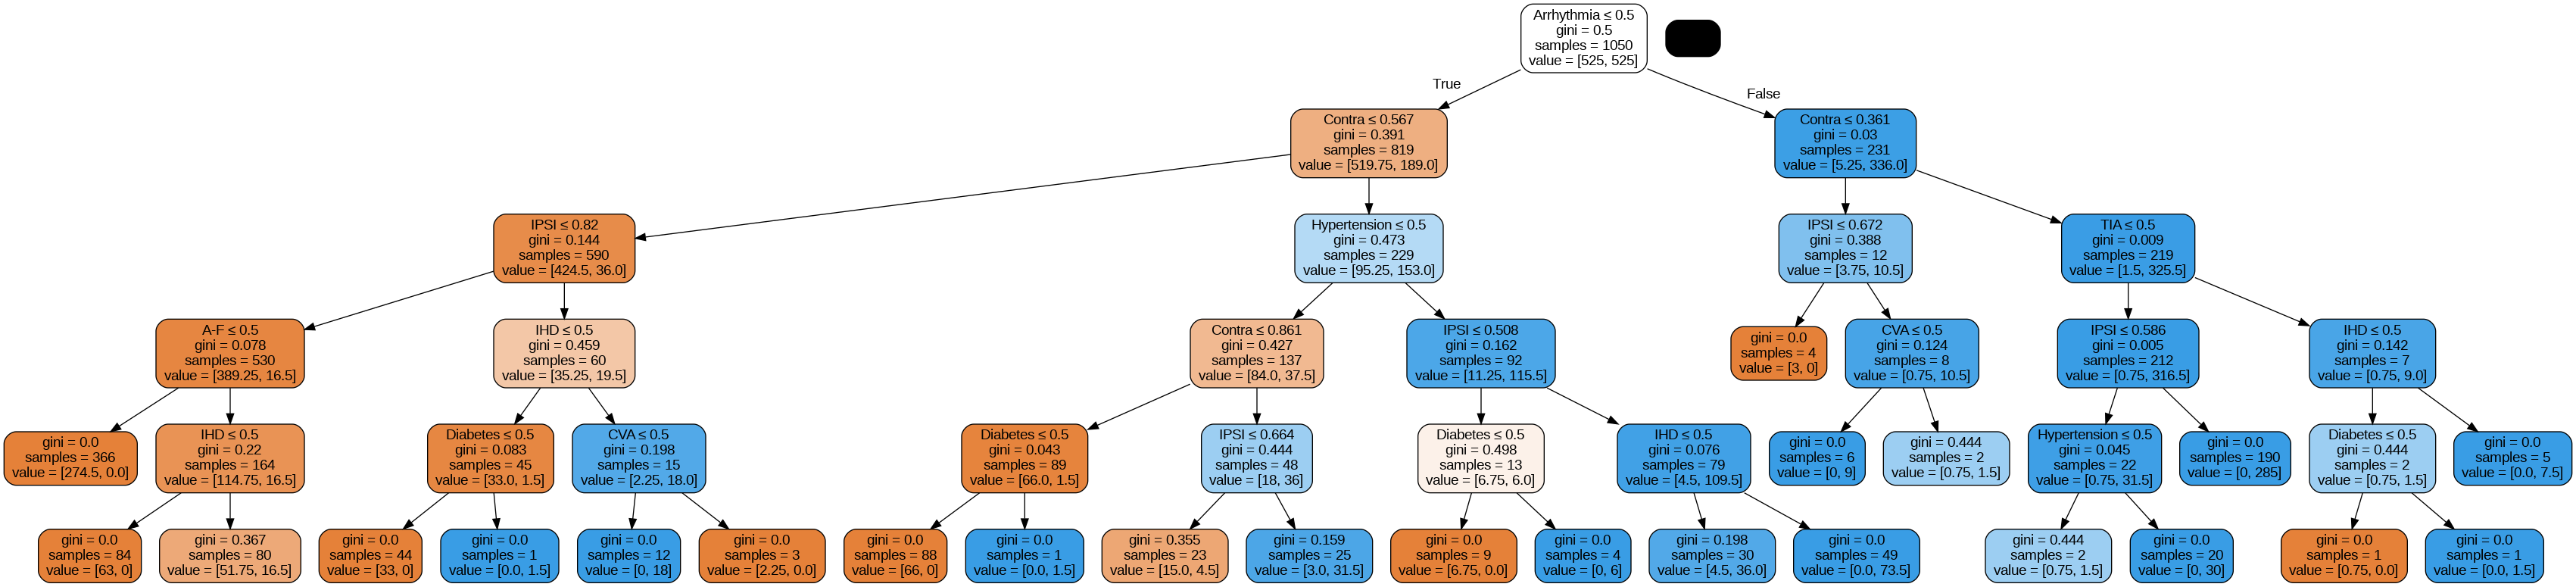

In [ ]:
features = list(x.columns)

tree.export_graphviz(clf, out_file='tree.dot',
               filled=True,
                     rounded=True,
                     special_characters=True,
                     feature_names = features)

graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

**We can observe how the model trains itself using the data and target that we provide it by looking at this decision tree. Observing how it splits at the summit of the tree is interesting. At the first step, it splits using Arrhythmia, then moves on to Contra, and so forth.**

In [ ]:
print(metrics.classification_report(y_test, pred))
cf_dt = confusion_matrix(y_test, pred)
print(cf_dt)
print("\n")
dtsqr = metrics.mean_squared_error(y_test, pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       300
           1       0.94      0.97      0.95       150

    accuracy                           0.97       450
   macro avg       0.96      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

[[291   9]
 [  5 145]]


Mean Absolute Error: 0.03111111111111111
Mean Squared Error: 0.03111111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


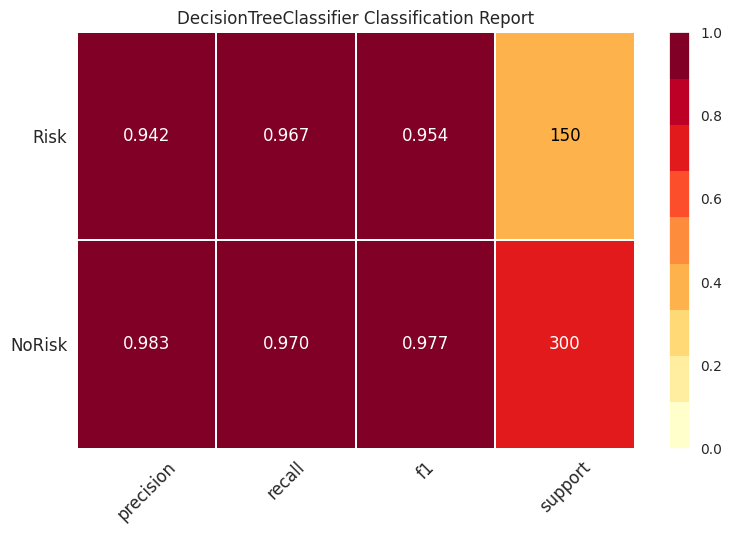

Confusion matrix, without normalization
[[291   9]
 [  5 145]]


Normalized confusion matrix
[[0.97 0.03]
 [0.03 0.97]]


<Axes: title={'center': 'Decision Tree Normalised Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

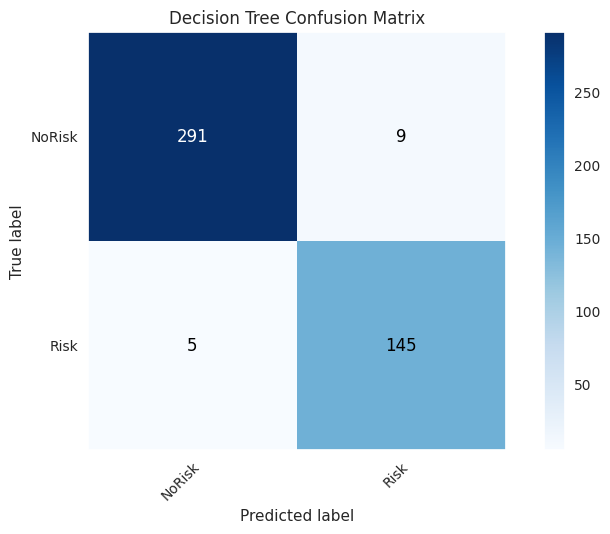

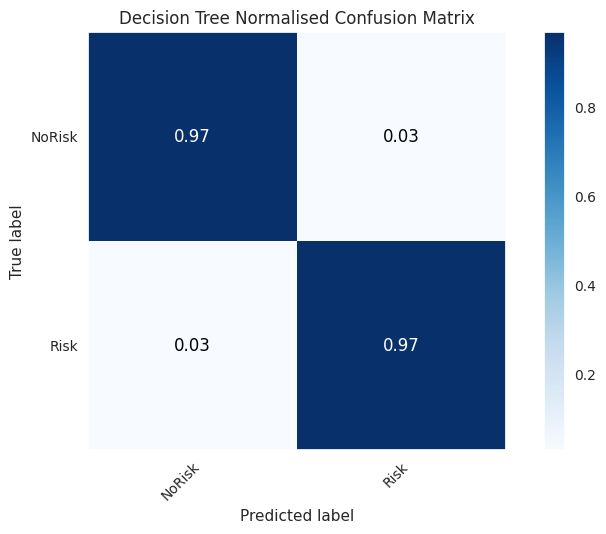

In [ ]:
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(clf, classes=['NoRisk','Risk'], support=True)
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, pred, classes=classes,
                      title='Decision Tree Confusion Matrix')
print("\n")
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, pred, classes=classes, normalize=True,
                      title='Decision Tree Normalised Confusion Matrix')

**The Risk precision score of 94% is the lowest accuracy value in this study. This indicates that while overall the results are still good, there is need for improvement as the decision tree struggled most to classify a Risk based on the data it was trained on.**

**Nonetheless, the Decision Tree model performs admirably in predicting the situations where we have 3% on both FP and FN.**

**Since the Decision Tree cannot be visualized for cross-validation without conforming to the tree, the accuracy result is examined rather than the previously visualized tree.**


In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dtscore = cross_val_score(clf, x, y, cv=10, scoring='accuracy')
print(dtscore)
print("\n")
print("Decision Tree Cross-Validation Accuracy : %0.2f (+/- %0.2f)" % \
      (dtscore.mean(), dtscore.std() * 2))

[0.97 0.96 0.99 0.95 0.97 0.98 0.95 0.97 0.98 0.97]


Decision Tree Cross-Validation Accuracy : 0.97 (+/- 0.03)


**Cross validation is ran using the same depth as before of 5, the same mean accuracy is achieved, with a pretty standard variance of 0.03.**

In [ ]:
y_pred = cross_val_predict(clf, x, y, cv = 10)
print(metrics.classification_report(y, y_pred))
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1000
           1       0.96      0.95      0.95       500

    accuracy                           0.97      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.97      0.97      0.97      1500

[[981  19]
 [ 26 474]]


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 0.03
Mean Squared Error: 0.03


**It is possible to visualise the predictions of the Decision Tree in a format such as that of a prediction to actual dataframe, DecisionTreeRegressor function of sklearn can be used for this.**

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
1069,0,0.0
1070,1,1.0
1071,0,0.0
1072,1,1.0
1073,0,0.0
1074,1,1.0
1075,0,0.0
1076,0,0.0
1077,0,0.0
1078,0,0.0


# **Model Evaluation**

**After training all three models and analyzing their output, it's critical to evaluate each model's performance and have a discussion about which one works best for the given task.**

##Accuracy Scores

In [ ]:
print("KNeighbours K=3 Accuracy Score : %0.2f" % knnaccuracy,"%")
print("Logistic Regression Accuracy Score : %0.2f" % logregaccuracy,"%")
print("Decision Tree Accuracy Score : %0.2f" % treeaccuracy,"%")

KNeighbours K=3 Accuracy Score : 0.96 %
Logistic Regression Accuracy Score : 0.97 %
Decision Tree Accuracy Score : 0.97 %


*While accuracy score is a useful starting point for assessing a model's performance, it is not the only metric to consider when assessing a model. A model's accuracy score indicates its progress toward the objective, but it does not provide information on individual model flaws.*

##Cross Validation Accuracy scores

In [ ]:
print("KNeighbours K=3 Cross-Validation Accuracy : %0.2f (+/- %0.2f)" % \
      (knnscore.mean(), knnscore.std() * 2))
print("Logistic Regression Cross-Validation Accuracy : %0.2f (+/- %0.2f)" % \
      (logregscore.mean(), logregscore.std() * 2))
print("Decision Tree Cross-Validation Accuracy : %0.2f (+/- %0.2f)" % \
      (dtscore.mean(), dtscore.std() * 2))

KNeighbours K=3 Cross-Validation Accuracy : 0.98 (+/- 0.03)
Logistic Regression Cross-Validation Accuracy : 0.97 (+/- 0.04)
Decision Tree Cross-Validation Accuracy : 0.97 (+/- 0.03)


*In this case, cross-validation is used to ensure that the model's achieved accuracy is consistent with what is obtained when training and testing the model on k-folds of the dataset. The mean score of all 10 folds of cross validation accuracy results is, in KNN, 2% higher. For the rest of two models, accuracy increses by 1%.*

*To determine how far a result deviates from the total of all 10 results, variance is used along with the outcome of each CV accuracy score.*

##Mean Squared Error of each Model

In [ ]:
print("KNeighbours K=3 Mean Squared Error :", knnsqr)
print("Logistic Regression Mean Squared Error :", logregsqr)
print("Decision Tree Mean Squared Error :", dtsqr)

KNeighbours K=3 Mean Squared Error : 0.042222222222222223
Logistic Regression Mean Squared Error : 0.03111111111111111
Decision Tree Mean Squared Error : 0.03111111111111111


##Confusion Matrices

In [ ]:
print("KNeighbours Confusion Matrix :\n", cf_knn)
print("Logistic Regression Confusion Matrix :\n", cf_lr)
print("Decision Tree Confusion Matrix :\n", cf_dt)

KNeighbours Confusion Matrix :
 [[291   9]
 [  9 141]]
Logistic Regression Confusion Matrix :
 [[294   6]
 [  8 142]]
Decision Tree Confusion Matrix :
 [[291   9]
 [  5 145]]


*The goal of a confusion matrix is to identify the instances in which the model correctly and incorrectly classifies positive results.*

*False Positive and False Negative are the most significant metrics of the Confusion Matrix. False negatives are considered dangerous because they result in a patient being misclassified as safe when they may actually need to be treated.*

##Classification Reports

**Classification Reports help to see the difference within each model when it comes to The scores of Precision, Recall and F1 score.**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


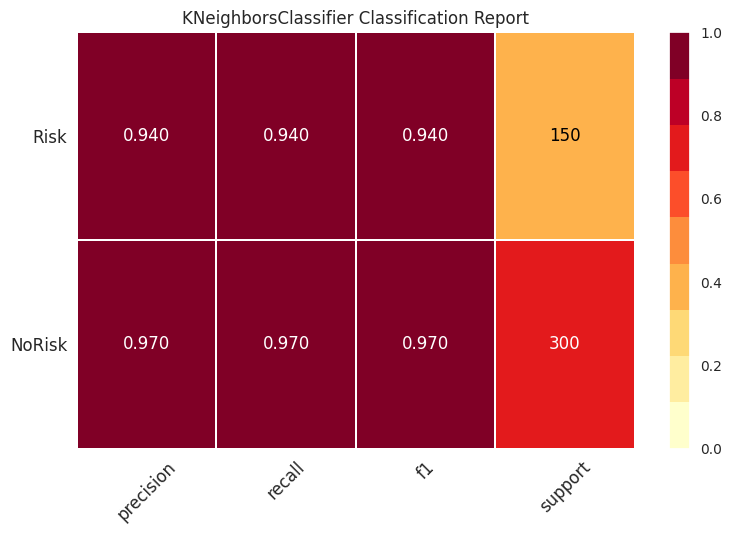

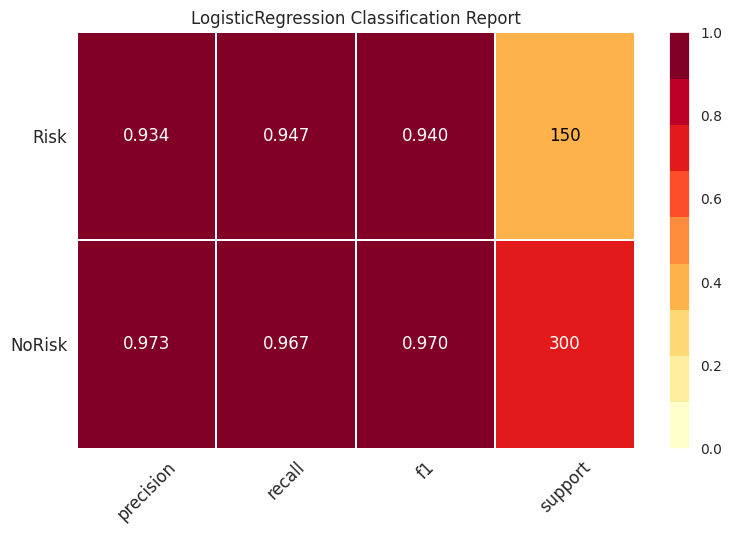

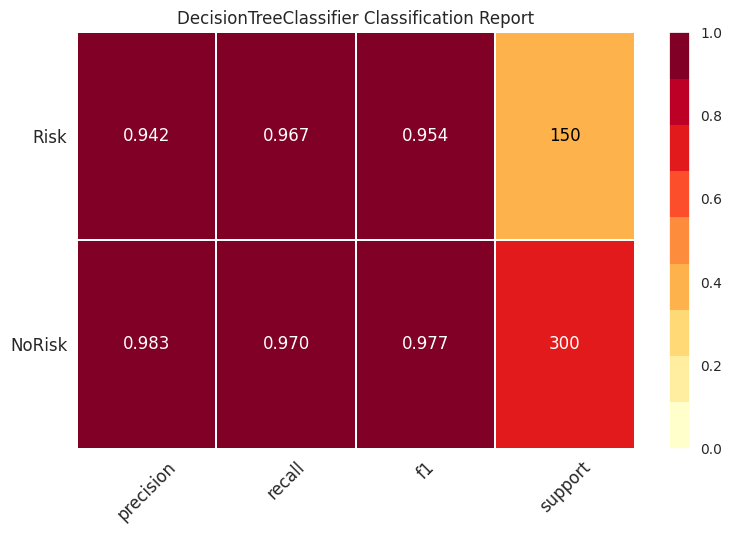

In [ ]:
visualizer = ClassificationReport(neigh, classes=['NoRisk','Risk'],support=True)
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof()

visualizer = ClassificationReport(logreg, classes=['NoRisk','Risk'],support=True)
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof()

visualizer = ClassificationReport(clf, classes=['NoRisk','Risk'],support=True)
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof()